## Numpy Summary

In this notebook, we will go through all the important numpy operations and functions that can be useful for mathematical calculations.

Numpy is a very fast and efficient library for linear algebra.

In [1]:
## imports
import numpy as np
import matplotlib.pyplot as plt

### 1. Creating Arrays

(array([ 8., 16., 31., 39., 42., 35., 15.,  8.,  3.,  3.]),
 array([-2.27417167, -1.74504522, -1.21591877, -0.68679232, -0.15766586,
         0.37146059,  0.90058704,  1.42971349,  1.95883994,  2.4879664 ,
         3.01709285]),
 <BarContainer object of 10 artists>)

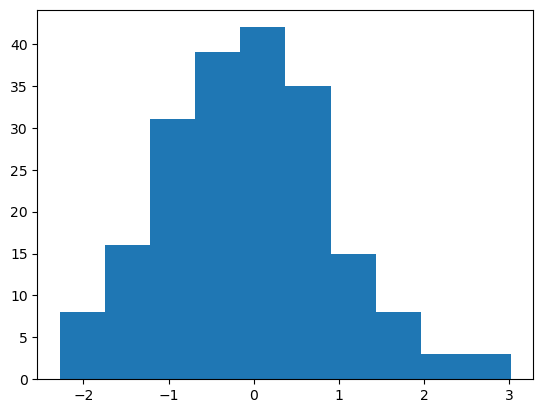

In [33]:
## depending on the task, there are many ways to generate an array

## creates an array from a list
a1 = np.array([1,2,3])
## creates an array of zeros with the passed size
a2 = np.zeros(5)
## creates an array of ones with passed size
a3 = np.ones(5)
## creates an array of random numbers between 0-1 
a4 = np.random.random(5)
## creates an array of random numbers with a normal ditribution provided size
a5 = np.random.randn(200)
## an array of linearly spaced values provided low, high, & size
a6 = np.linspace(0, 10, 100)
## arange is similar to linspace, but you specify the spacing, instead of the size
a7 = np.arange(0, 10, 0.1)
## then we can create simple plots
plt.hist(a5)

### 2. Array Operations

#### Why we use arrays instead of regular Python lists.

In [34]:
## we can do element-wise operations, unlike lists
a1 = 2* a1
a1 = 1 / a1 + 2
a1 = a1**3/2
a1 = a1[a1 > 1]
a1

array([7.8125    , 5.6953125 , 5.08564815])

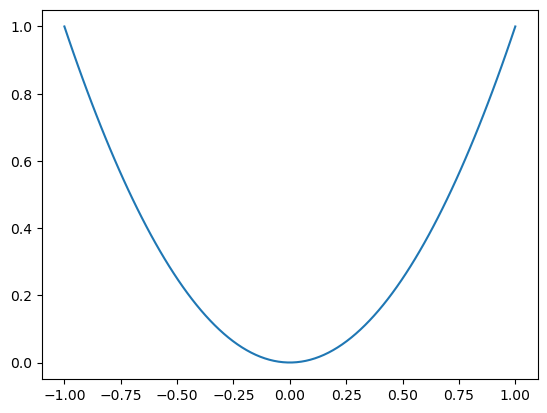

In [17]:
## we can use these for plotting
x = np.linspace(-1, 1, 100)
y = x ** 2 

plt.plot(x, y)

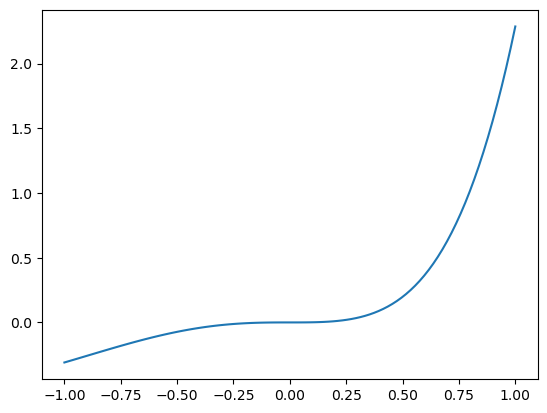

In [24]:
## we can also chain multiple operation in one go
def f(x):
    return x ** 2 * np.sin(x) / np.exp(-x)
x = np.linspace(-1, 1, 100)
y = f(x)

plt.plot(x, y)

### 3. Indexing and Slicing 

In [32]:
## indexing can be as simple as passing in one number
## to multiple ones for arrays w/ multiple dimensions
a1[1]
a1[1:]
a1[:-2]
## boolean indexing is very important as well
a1[a1>1]
## we can use more complex ways of filtering by vectorizing a function
names = np.array(['Jeff', 'Tim', 'Jess', 'Pete'])
vec_func = np.vectorize(lambda x:x[0])
j_names = names[vec_func(names) == 'J']
j_names

array(['Jeff', 'Jess'], dtype='<U4')

### 4. Calculus & Statistical Functions

In [39]:
## suppose we want to generate a normal dist
## with STD of 2 and Mu of 10
randa = 2 * np.random.randn(10000) + 10
print(f'STD: {np.std(randa)} Mean: {np.mean(randa)} 25 Percentile : {np.percentile(randa, 25)}')

STD: 2.0290925412018224 Mean: 9.980001845949614 25 Percentile : 8.60098245479559


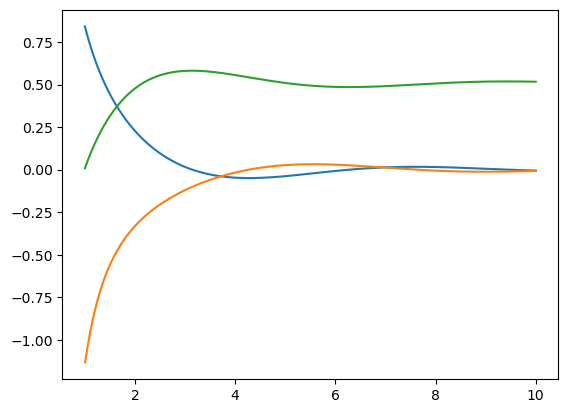

In [53]:
## Integrals and derivatives
x = np.linspace(1, 10, 1000)
y = 1/x**2 * np.sin(x) 
## now getting the derivtavie
dydx = np.gradient(y, x)
## and then the integral
integ = np.cumsum(y) * (x[1] - x[0])
## and for the visualization
plt.plot(x, y)
plt.plot(x, dydx)
plt.plot(x, integ)

mean: -0.2956362863932012 std: 0.3144532369395424 80% percentile: 0.061372680560897265
[1.47114711 4.61346135 7.75477548]


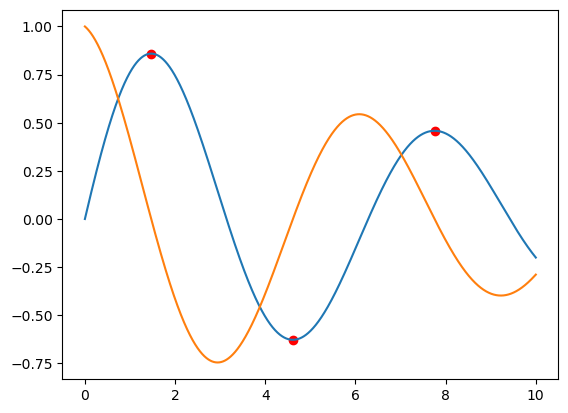

In [69]:
x = np.linspace(0, 10, 10000)
y_func = lambda x:np.exp(-x/10) * np.sin(x)

## y[(x>4)*(x<7)]
## mean & std for 4 < x < 7
print(f'mean: {np.mean(y_func(x[(x > 4) & (x < 7)]))} std: {np.std(y_func(x[(x > 4) & (x < 7)]))} 80% percentile: {np.percentile(y_func(x[(x > 4) & (x < 7)]), 80)}')
## derivative
dydx = np.gradient(y_func(x), x)
## if we were to find the min/max values
## we can try to find the values in dydx
## when there's a change in sign
print(x[1:][dydx[1:]*dydx[:-1] < 0])
critical_x = x[1:][dydx[1:]*dydx[:-1] < 0]

plt.plot(x, y_func(x))
plt.plot(x, dydx)
plt.scatter(critical_x, y_func(critical_x), color='red')

In [75]:
## suppose we want to sum all the numbers between 0-10000 except the ones that can be divided by 4 or 7
num_sum = sum(np.arange(0, 10001, 1)[np.vectorize(lambda x: x%4 * x%7)(np.arange(0, 10001, 1))!=0])
num_sum

32147142

Consider the following equation

\begin{align}
r(\theta) = 1 + \frac{3}{4} \sin(3 \,\theta)  \text{ for }  0 \le \theta \le 2\,\pi 
\end{align}

1. Make a plot for x and y
2. Compute the area using the formula $ A = \int_0^{2\pi} \frac{1}{2}r^2 d\theta $
3. Compute the arclength using the formula  $L = \int_{0}^{2 \pi} \sqrt{r^2 + \left(\frac{dr}{d\theta}\right)^2} d\theta$

4.025479778096348
11.626531213518831


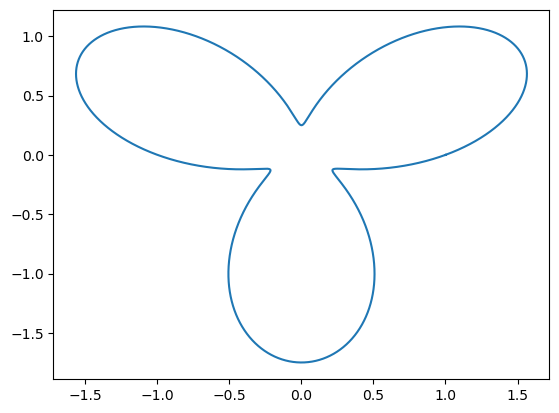

In [91]:
theta = np.linspace(0, 2 * np.pi, 10000)
r = 1 + 3/4 * np.sin(3 * theta)
x = r * np.cos(theta)
y = r * np.sin(theta)
## 1
plt.plot(x, y)
## 2
A = 1/2 * sum(r **2) * (theta[1] - theta[0])
print(A)
# ## 3
l = sum(np.sqrt(r**2 + np.gradient(r, theta) ** 2)) * (theta[1] - theta[0])
print(l)

### 5. Multi-Dimensional Arrays

In [102]:
md1 = np.array([[1,2,3],[4,5,6], [7,8,9]]) 
md2 = np.random.randn(3,4)
md3 = np.zeros((2,2))
## and we can use the same operations on md arrays
2/md1
## and we can turn md arrays to 1d as well
md1.ravel()
## and the boolean indexing works the same way
md1[md1 > 3]
md1[1,2]
md1[:, 1]
md1[1:,1:]

array([[5, 6],
       [8, 9]])

### 6. 2D Functions

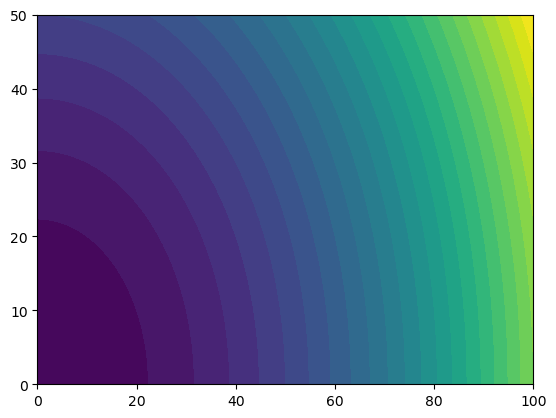

In [109]:
## if we create x and y the following way
## then z will be only a 1d array
## but if we want to actually create a coordinate from our arrays
## we should be using meshgrid, to basically create 2d coordinates
x = np.linspace(0, 100, 1000)
y = np.linspace(0, 50, 1000)
## z is still 1d when created this way
z = x**2 + y**2
## for 2d/3d we should be doing this
xv, yv = np.meshgrid(x, y)
z = xv **2 + yv **2
plt.contourf(xv, yv, z, levels = 30)

### 7. Basic Linear Algebra
Matrix Operations

In [117]:
m = np.random.rand(3,3)
v1 = np.random.rand(3)
v2 = np.random.randint(0,10, 3)
## for multiplying a matrix by a vector
## depending on the type, we can use *, cross, @, or np.dot
## where the last two are the same 
m2 = m*v1
v3 = np.dot(m, v2)
v4 = np.cross(v1, v2)
## we can also simply transpose the matrix
m2.T

array([[0.62005719, 0.44270108, 0.61163428],
       [0.41752443, 0.28904548, 0.07343326],
       [0.18413151, 0.36580048, 0.32158172]])

Solving the systems of equations like the one below:
\begin{align}
3x + 2y + z = 4 \\[1em]
5x - 5y + 4z = 3 \\[1em]
6x + z = 0
\end{align}

In [124]:
x = np.array([3, 5, 6])
y = np.array([2, -5, 0])
z = np.array([1, 4, 1])
m = np.array([x, y, z]).T
r = np.array([4, 3, 0])
## and we can simply solve the equation the following way
np.linalg.solve(m, r)

array([-0.49056604,  1.26415094,  2.94339623])

Finding Eigenvalues and Eigenvectors are as simple as well

In [131]:
A = np.array([[4,2,2],[2,4,2],[2,2,4]])
eival, eive = np.linalg.eig(A)
## to check 
verif = eival[0] * eive[:, 0]
A@eive[:,0] 

array([-1.63299316,  0.81649658,  0.81649658])

In [132]:
verif

array([-1.63299316,  0.81649658,  0.81649658])

$f(x,y) = e^{-x^2 + y^2}.\sin(x) $ for $-2\le x\le2$ and $-2\le y \le 2$
1. Make a contour plot of f
2. Find the volume $|f(x,y)|$ in the specified x and y range.
3. Find the volume $|f(x,y)|$ only in the region where $\sqrt {x^2 + y^2} > 0.5$

1.4861858145125453
1.344765293020408


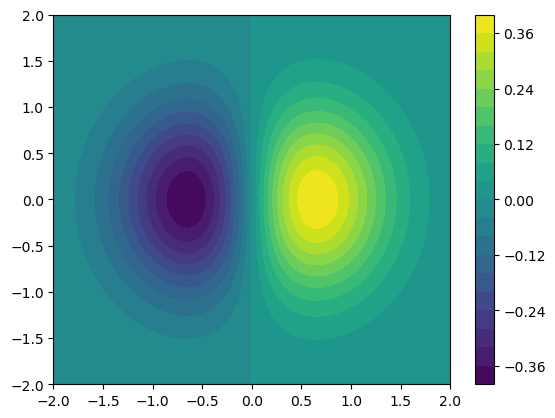

In [152]:
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
xg, yg = np.meshgrid(x, y)
f = np.exp(-(xg**2 + yg**2))*np.sin(xg)
## 1
plt.contourf(xg, yg, f, levels = 20)
plt.colorbar()
## 2
## we need to flatten f for the sum
## and since it's volume, we need to use abs
## and we need to also multiply it by dxdy
## and since we used linspace for creating the arrays
## we can just grab the first diff, which is the same across
volume = sum(np.abs(f.ravel())) * np.diff(x)[0] * np.diff(y)[0]
print(volume)
## 3
volume_2 = sum(np.abs(f[xg**2 + yg**2 > 0.5 **2].ravel())) * np.diff(x)[0] * np.diff(y)[0]
print(volume_2)

Solve the following system of equations for all $V$ values:
\begin{align}
3V_1 + 2V_2 + 3V_3 + 10V_4 = 4 \\[1em]
2V_1 - 2V_2 + 5V_3 + 8V_4 = 1 \\[1em]
3V_1 + 3V_2 + 4V_3 + 9V_4 = 3 \\[1em]
3V_1 + 4V_2 - 3V_3 - 7V_4 = 2
\end{align}

In [154]:
m = np.array([[3,2,3,10], [2,-2,5,8], [3,3,4,9], [3,4,-3,-7]])
r = np.array([4,1,3,2])
result = np.linalg.solve(m, r)
result

array([ 0.78378378,  0.03603604, -0.67567568,  0.36036036])

An electric field is given by $ \vec E = E_0 \cos(z - t) \hat x + 2 E_0 \cos(z - t + \frac{\pi}{2}) \hat y$

1. Find the magnetic field for all $ z \in |0, 4\pi| $ and $ t \in |0, 10| $ using $ \vec B(z, t) = \hat z \times \vec E (z, t)$
2. Compute the polynting vector $ \vec S = \vec E \times \vec B $ for all $z$ and $t$

In [163]:
z = np.linspace(0, 4*np.pi, 1000)
t = np.linspace(0, 10, 1000)
zg, tg = np.meshgrid(z, t)
Ex = np.cos(zg-tg)
Ey = 2 * np.cos(zg - tg + np.pi/2)
## Ez is always zero
Ez = 0 * tg
## and then E is a multi-dimensial array from all Es
E = np.array([Ex, Ey, Ez])
## but we need to have Ex, Ey, Ez for each row
## and swapaxes will help us with that
E = np.swapaxes(E, 0, -1)
## and we need the cross product to create B
B = np.cross(np.array([0,0,1]), E)
## and then we have to swap them back
B = np.swapaxes(B, 0, -1)
## and we can simply assign each element to a new array
Bx, By, Bz = B
Bx

array([[-1.22464680e-16,  2.51572357e-02,  5.03104908e-02, ...,
        -5.03104908e-02, -2.51572357e-02, -1.10218212e-15],
       [-2.00196857e-02,  5.13787346e-03,  3.02946196e-02, ...,
        -7.03213208e-02, -4.51740772e-02, -2.00196857e-02],
       [-4.00373654e-02, -1.48820036e-02,  1.02757130e-02, ...,
        -9.03251047e-02, -6.51863922e-02, -4.00373654e-02],
       ...,
       [ 1.05422997e+00,  1.03276810e+00,  1.01114282e+00, ...,
         1.09664992e+00,  1.07552503e+00,  1.05422997e+00],
       [ 1.07118976e+00,  1.04986036e+00,  1.02836484e+00, ...,
         1.11333675e+00,  1.09234967e+00,  1.07118976e+00],
       [ 1.08804222e+00,  1.06684742e+00,  1.04548382e+00, ...,
         1.12991202e+00,  1.10906486e+00,  1.08804222e+00]])

In [166]:
## and for the second part
S = np.swapaxes(np.cross(E, np.swapaxes(B, 0, -1)), 0, -1)
Sx, Sy, Sz = S
Sx

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])